In [448]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
plt.style.use('bmh')

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, Lasso

In [2]:
# Load the data from concrete.csv file
concrete_df = pd.read_csv('concrete.csv')
concrete_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
#Let's check the data types of each column
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [4]:
# Let's see any null or missing values in data.
concrete_df.isna().any().all()
# There are no missing values in column.

False

In [5]:
# Generate descriptive statistics of concrete data
concrete_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [6]:
concrete_df.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

In [7]:
#Let's see the concrete shape and head and tail.
print(f'Num of rows == {concrete_df.shape[0]} and Num of columns == {concrete_df.shape[1]}')
concrete_df.head(10)

Num of rows == 1030 and Num of columns == 9


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [8]:
concrete_df.tail(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1020,183.9,122.6,0.0,203.5,0.0,959.2,800.0,7,10.79
1021,203.5,305.3,0.0,203.5,0.0,963.4,630.0,3,9.56
1022,144.8,0.0,133.6,180.8,11.1,979.5,811.5,28,13.20
1023,141.3,212.0,0.0,203.5,0.0,971.8,748.5,7,10.39
1024,297.2,0.0,117.5,174.8,9.5,1022.8,753.5,3,21.91
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


### univariate

Cement skew: 0.5094811788717731
min of cement: 102.0 and max of cement: 540.0


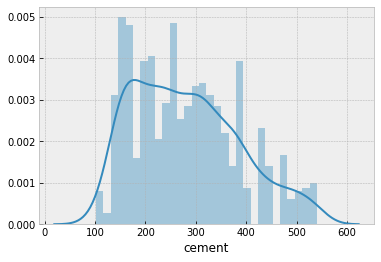

In [9]:
# Check the disrtibution on cement column data
sns.distplot(concrete_df.cement,bins=30,kde=True)

# Let's see the skewness of cement
print(f'Cement skew: {concrete_df.cement.skew()}')

print(f"min of cement: {concrete_df.cement.min()} and max of cement: {concrete_df.cement.max()}")
# As we can see the data almost distrbutted nomrally and bit postivally skewed.
# we can consider this.

In [10]:
# Rename the 'Blast' to 'blast_furnace_slag' for understanding purpose.
concrete_df['blast_furnace_slag'] = concrete_df.slag
concrete_df.drop(columns='slag',inplace=True)

blast_furnace_slag skew: 0.8007168956061774
min of blast_furnace_slag: 0.0 and max of blast_furnace_slag: 359.4


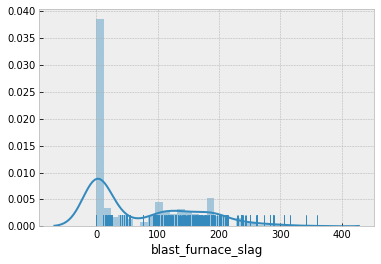

In [11]:
# Check the disrtibution on blast_furnace_slag column data
sns.distplot(concrete_df.blast_furnace_slag,bins=30,kde=True,rug=True)

# Let's see the skewness of cement
print(f'blast_furnace_slag skew: {concrete_df.blast_furnace_slag.skew()}')

print(f"min of blast_furnace_slag: {concrete_df.blast_furnace_slag.min()} and max of blast_furnace_slag: {concrete_df.blast_furnace_slag.max()}")
# As we can see the data are postivally skewed.
# And data is not normally distributted.


In [12]:
# let's check any values less than 0.0
print(f"Any values less than 0.0 count: {concrete_df.blast_furnace_slag[concrete_df.blast_furnace_slag < 0].count()}")

# let's check count of 0'zeros' in blast_furnace_slag.
blast_furnace_slag_zero_count = concrete_df.blast_furnace_slag[concrete_df.blast_furnace_slag == 0].count()
percent = len(concrete_df.blast_furnace_slag[concrete_df.blast_furnace_slag == 0]) / len(concrete_df.index) * 100
print(f"zeros in blast_furnace_slag: {blast_furnace_slag_zero_count} and percentage of distribution: {percent}")

Any values less than 0.0 count: 0
zeros in blast_furnace_slag: 471 and percentage of distribution: 45.728155339805824


* 'blast_furnace_slag' is added to concrete for improving the strength.
* Then concrete may or may not contain 'blast_furnace_slag'. So, then, 'blast_furnace_slag' may conatin 0 'zeros'.

In [13]:
# Rename the 'ash' to ' fly_ash' for understanding purpose.
concrete_df['fly_ash'] = concrete_df.ash
concrete_df.drop(columns='ash',inplace=True)

fly_ash skew: 0.5373539058066844
min of fly_ash: 0.0 and max of fly_ash: 200.1


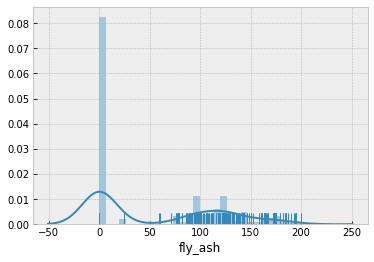

In [14]:
# Check the disrtibution on fly_ash column data
sns.distplot(concrete_df.fly_ash,bins=30,kde=True,rug=True)

# Let's see the skewness of cement
print(f'fly_ash skew: {concrete_df.fly_ash.skew()}')

print(f"min of fly_ash: {concrete_df.fly_ash.min()} and max of fly_ash: {concrete_df.fly_ash.max()}")
# As we can see the data are postivally skewed.
# And data is not normally distributted.


In [15]:
# let's check any values less than 0.0
print(f"Any values less than 0.0 count: {concrete_df.fly_ash[concrete_df.fly_ash < 0].count()}")

# let's check count of 0'zeros' in fly_ash.
fly_ash_zero_count = concrete_df.fly_ash[concrete_df.fly_ash == 0].count()
percent_fly_ash = len(concrete_df.fly_ash[concrete_df.fly_ash == 0]) / len(concrete_df.index) * 100
print(f"zeros in fly_ash: {fly_ash_zero_count} and percentage of distribution: {percent_fly_ash}")

Any values less than 0.0 count: 0
zeros in fly_ash: 566 and percentage of distribution: 54.95145631067962


water skew: 0.07462838428549402
min of water: 121.8 and max of water: 247.0


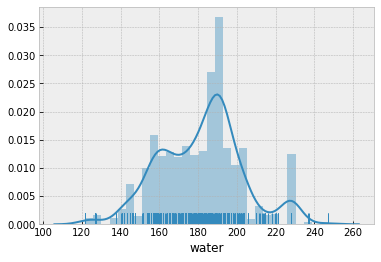

In [16]:
# Check the disrtibution on water column data
sns.distplot(concrete_df.water,bins=30,kde=True,rug=True)

# Let's see the skewness of water
print(f'water skew: {concrete_df.water.skew()}')

print(f"min of water: {concrete_df.water.min()} and max of water: {concrete_df.water.max()}")
# And data is almost normally distributted.


superplastic skew: 0.9072025748672466
min of superplastic: 0.0 and max of superplastic: 32.2


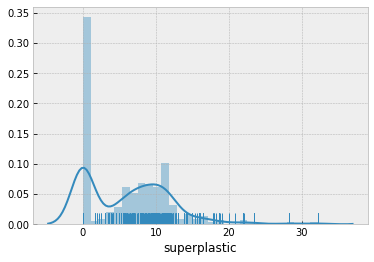

In [17]:
# Check the disrtibution on superplastic column data
sns.distplot(concrete_df.superplastic,bins=30,kde=True,rug=True)

# Let's see the skewness of superplastic
print(f'superplastic skew: {concrete_df.superplastic.skew()}')

print(f"min of superplastic: {concrete_df.superplastic.min()} and max of superplastic: {concrete_df.superplastic.max()}")
# As we can see the data are postivally skewed.

* Superplasticizers (SP's), also known as high range water reducers, are additives used in making high strength concrete.

In [18]:
# let's check any values less than 0.0
print(f"Any values less than 0.0 count: {concrete_df.superplastic[concrete_df.superplastic < 0].count()}")

# let's check count of 0'zeros' in superplastic.
superplasticfly_ash_zero_count = concrete_df.superplastic[concrete_df.superplastic == 0].count()
percent_superplastic = len(concrete_df.superplastic[concrete_df.superplastic == 0]) / len(concrete_df.index) * 100
print(f"zeros in superplastic: {superplasticfly_ash_zero_count} and percentage of distribution: {percent_superplastic}")

Any values less than 0.0 count: 0
zeros in superplastic: 379 and percentage of distribution: 36.79611650485437


coarseagg skew: -0.04021974481106704
min of coarseagg: 801.0 and max of coarseagg: 1145.0


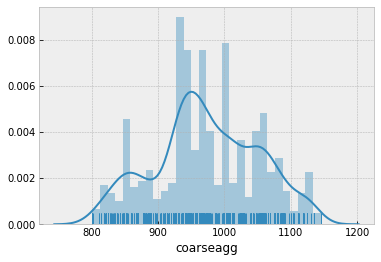

In [19]:
# Check the disrtibution on coarseagg column data
sns.distplot(concrete_df.coarseagg,bins=30,kde=True,rug=True)

# Let's see the skewness of coarseagg
print(f'coarseagg skew: {concrete_df.coarseagg.skew()}')

print(f"min of coarseagg: {concrete_df.coarseagg.min()} and max of coarseagg: {concrete_df.coarseagg.max()}")
# As we can see the data is normally distributted.

fineagg skew: -0.25300959769707143
min of fineagg: 594.0 and max of fineagg: 992.6


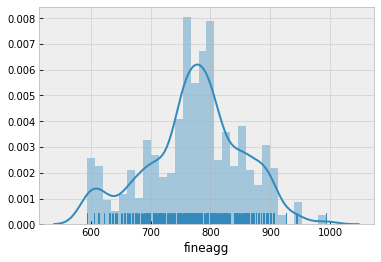

In [20]:
# Check the disrtibution on fineagg column data
sns.distplot(concrete_df.fineagg,bins=30,kde=True,rug=True)

# Let's see the skewness of fineagg
print(f'fineagg skew: {concrete_df.fineagg.skew()}')

print(f"min of fineagg: {concrete_df.fineagg.min()} and max of fineagg: {concrete_df.fineagg.max()}")
# As we can see the data is normally distributted.

age skew: 3.2691774006345895
min of age: 1 and max of age: 365


28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

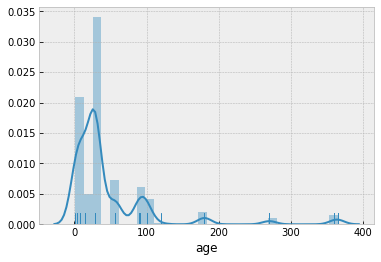

In [21]:
# Check the disrtibution on age column data
sns.distplot(concrete_df.age,bins=30,kde=True,rug=True)

# Let's see the skewness of age
print(f'age skew: {concrete_df.age.skew()}')

print(f"min of age: {concrete_df.age.min()} and max of age: {concrete_df.age.max()}")
# As we can see the data postively skewed.

#let's check individual age value counts
concrete_df.age.value_counts()

* Here, we can see 80% of the data is distributted in top 4 days. those are 28,3,7 and 56 days respectively.

strength skew: 0.41697728841071807
min of strength: 2.33 and max of strength: 82.6


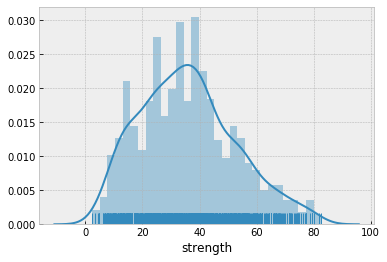

In [22]:
# Check the disrtibution on strength column data
sns.distplot(concrete_df.strength,bins=30,kde=True,rug=True)

# Let's see the skewness of strength
print(f'strength skew: {concrete_df.strength.skew()}')

print(f"min of strength: {concrete_df.strength.min()} and max of strength: {concrete_df.strength.max()}")
# As we can see the data is normally distributted.

* Concrete compressive strength requirements can vary from 2500 psi (17 MPa) for residential concrete to 4000 psi (28 MPa) and higher in commercial structures. Higher strengths up to and exceeding 10,000 psi (70 MPa) are specified for certain applications.
* And we have less than 17MPa and greater than 70Mpa. Need to check, how is it being influenced by indepented variables.

### Bivariate

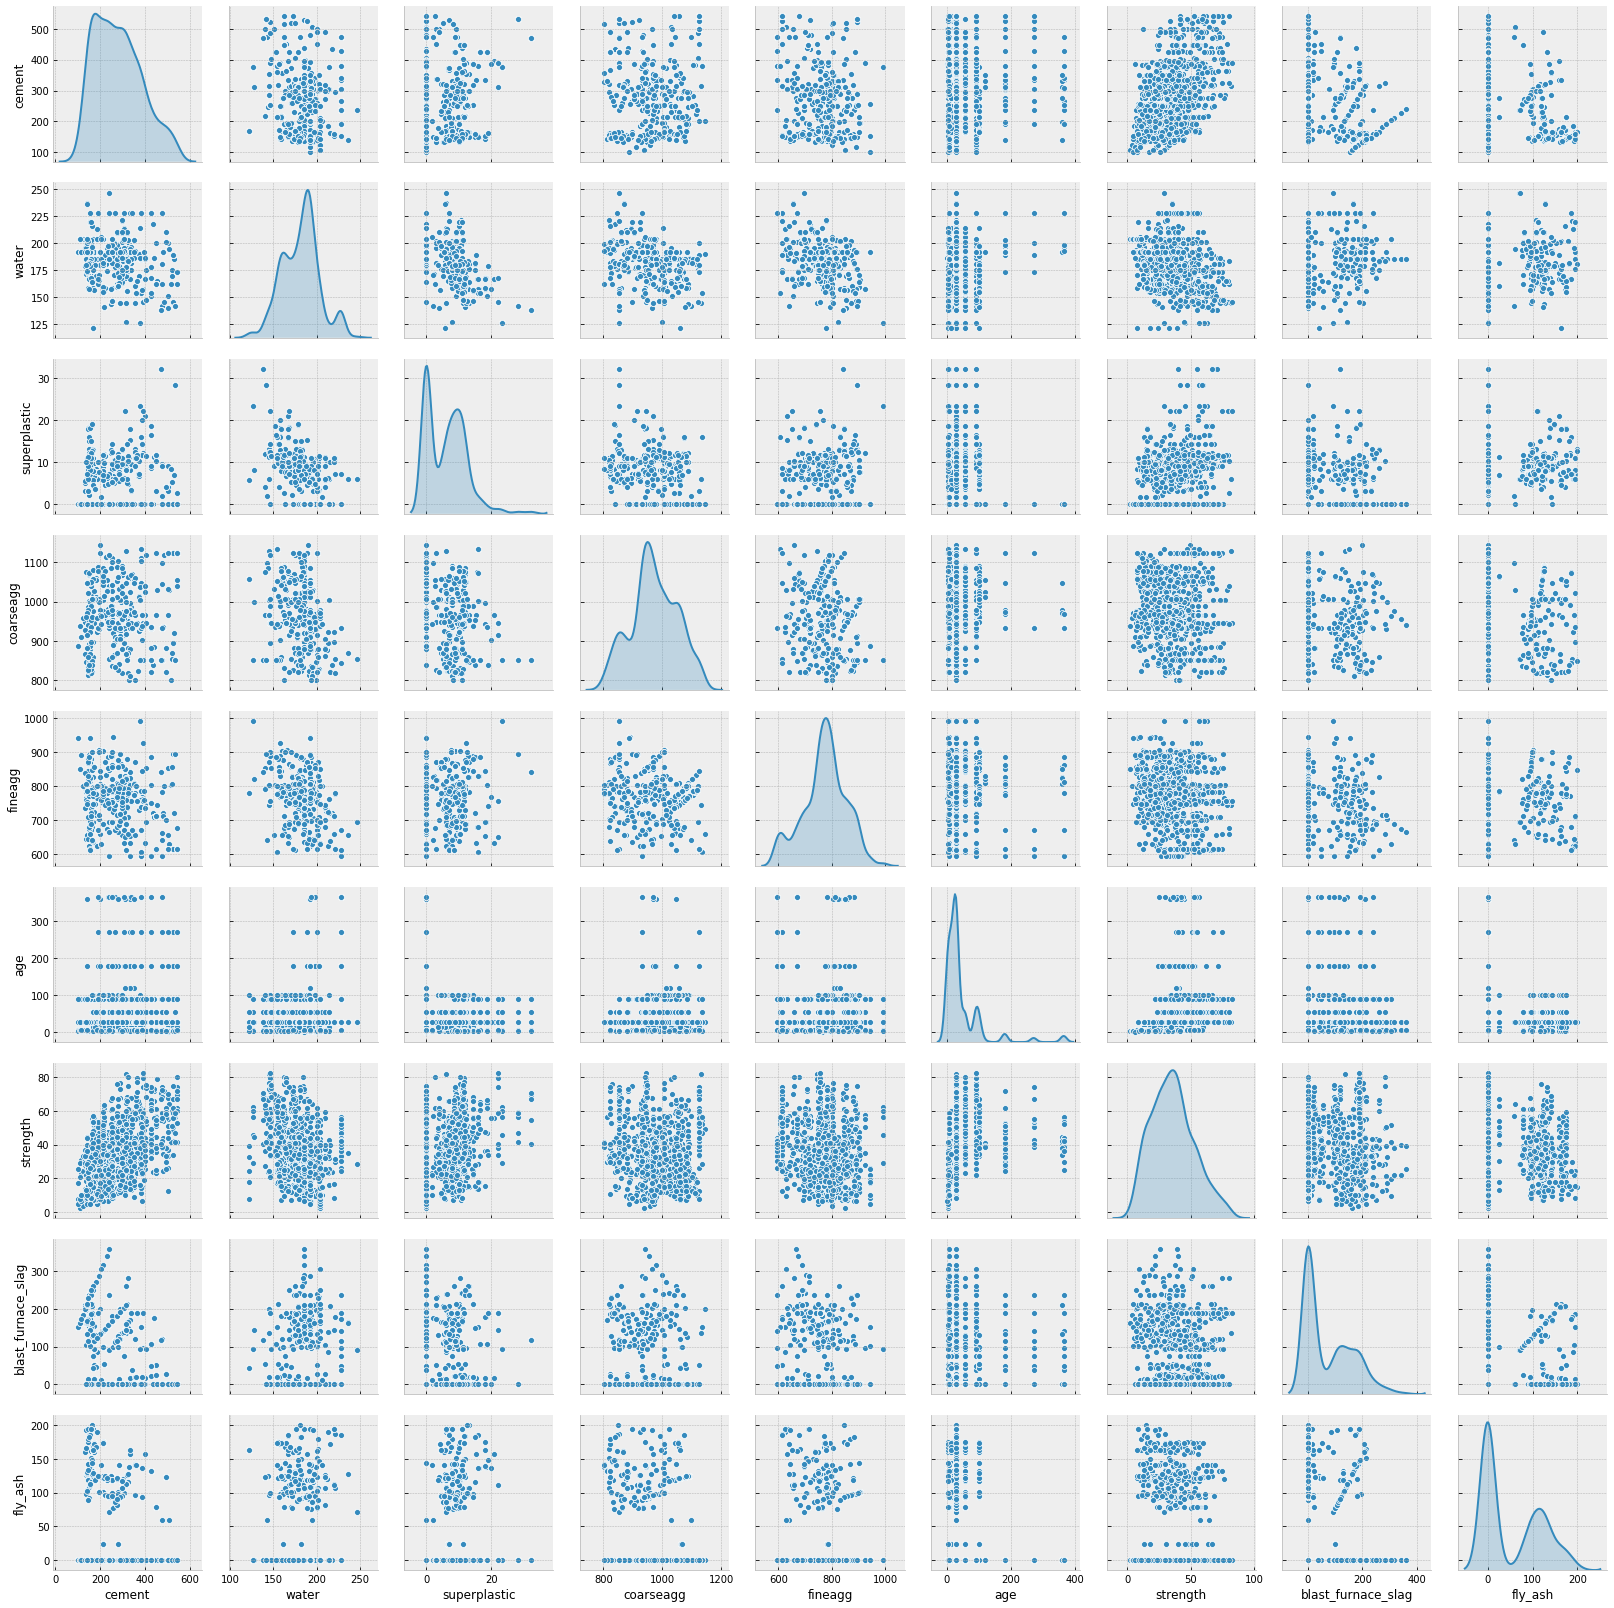

In [23]:
sns.pairplot(concrete_df,diag_kind = 'kde')

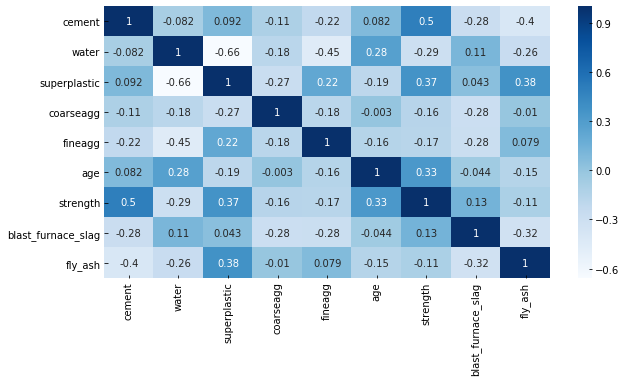

In [24]:
corr = concrete_df.corr()
plt.figure(figsize=(10,5),)
sns.heatmap(corr,annot=True,cmap='Blues',)

* As we can see cement, superplastic,age are positive correlation to the strength 
* But , where as water is negative correlation to the strength.
* As we go through the pariplot, we can see there are minimum 3 clusters.

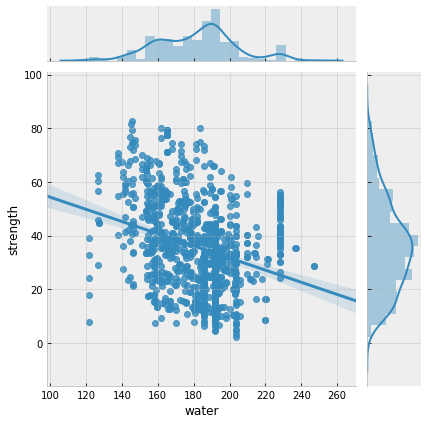

In [25]:
sns.jointplot('water','strength',data=concrete_df,kind='reg') 

[Text(0, 0, 'cement'),
 Text(0, 0, 'water'),
 Text(0, 0, 'superplastic'),
 Text(0, 0, 'coarseagg'),
 Text(0, 0, 'fineagg'),
 Text(0, 0, 'age'),
 Text(0, 0, 'strength'),
 Text(0, 0, 'blast_furnace_slag'),
 Text(0, 0, 'fly_ash')]

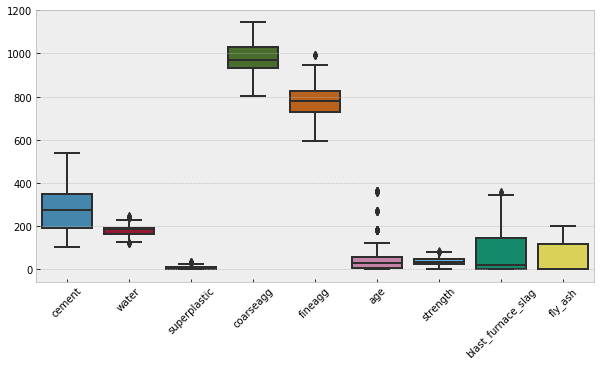

In [26]:
# lets check outliers in concrerte dataframe
plt.figure(figsize=(10,5),)
boxplt = sns.boxplot(data=concrete_df)
boxplt.set_xticklabels(boxplt.get_xticklabels(), rotation=45)

* As we can see, age has that long tail on right side. which are outliers.

## scale the data

In [49]:
from scipy.stats import zscore

In [64]:
concrete_scaled_df_z = concrete_df.apply(zscore)

In [65]:
X = concrete_scaled_df_z.drop(columns=['strength'])
y = concrete_scaled_df_z.strength

## train test and split

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state=42)

### Let's check accuracy of models like SVR, LinearRegression with actual data

In [296]:
svr = SVR()
svr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [389]:
svr_train_score = svr.score(X_train,y_train)
svr_test_score = svr.score(X_test,y_test)
print(f"Train score: {svr_train_score}")
print(f"Test score: {svr_test_score}")
svr_pred = svr.predict(X_test)
corr_svr, p_val_svr = pearsonr(y_test,svr_pred)
print(f"pearsonr Values: {corr_svr} {p_val_svr}")

Test score: 0.8104933679836134
pearsonr Values: 0.9007246641565129 3.4068041383259066e-113


In [409]:
svr_dict = {'model_name':'SVR',
            'data_consideration':'considering whole data',
            'train_score': [svr_train_score],
            'test_score':[svr_test_score],
            'corrcoeff':[corr_svr],
            'p_val':[p_val_svr],
           }
tracker_df = pd.DataFrame(svr_dict)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113


In [308]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [398]:
LR_train_score = LR.score(X_train,y_train)
LR_test_score = LR.score(X_test,y_test)
print(f"Train score: {LR_train_score}")
print(f"Test score: {LR_test_score}")
LR_pred = LR.predict(X_test)
corr_LR, p_val_LR = pearsonr(y_test,LR_pred)
print(f"pearsonr Values: {corr_LR} {p_val_LR}")

Train score: 0.6271470626341014
Test score: 0.5845101408706102
pearsonr Values: 0.7669523589956694 4.2077168312113206e-61


In [410]:
LR_dict = {'model_name':'LineraRegression',
            'data_consideration':'considering whole data',
            'train_score': [LR_train_score],
            'test_score':[LR_test_score],
            'corrcoeff':[corr_LR],
            'p_val':[p_val_LR]
           }
df = pd.DataFrame(LR_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61


In [383]:
DT = DecisionTreeRegressor(max_depth=4)
DT.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [412]:
DT_train_score = DT.score(X_train,y_train)
DT_test_score = DT.score(X_test,y_test)
print(f"Train score: {DT_train_score}")
print(f"Test score: {DT_test_score}")
DT_pred = DT.predict(X_test)
corr_DT, p_val_DT = pearsonr(y_test,DT_pred)
print(f"pearsonr Values: {corr_DT} {p_val_DT}")

Train score: 0.7286342678873313
Test score: 0.6655614189464814
pearsonr Values: 0.8161446208156032 4.1904192237152316e-75


In [413]:
DT_dict = {'model_name':'Decision Tree Regressor',
            'data_consideration':'considering whole data',
            'train_score': [DT_train_score],
            'test_score':[DT_test_score],
            'corrcoeff':[corr_DT],
            'p_val':[p_val_DT]
           }
df = pd.DataFrame(DT_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75


* As we can see, SVR is givving good score.
* Where as DecisionTree and LinearRegression score are in same range.

## KMeans

In [28]:
# Before taking action on outliers, we build K-Means cluster. 
# Let's see , number of cluster in data. Then, will see how strongly independent variables influence strength.

In [56]:
from sklearn.cluster import KMeans

In [62]:
inertia = []
cluster_range = range(3,15)
for k in cluster_range:
    kModel = KMeans(n_clusters=k)
    kModel.fit(concrete_df)
    inertia.append(kModel.inertia_)

cluster_df = pd.DataFrame({"clusters": cluster_range, "errors": inertia})
cluster_df

,clusters,errors
0,3,2.499578e+07
1,4,2.197713e+07
2,5,1.955535e+07
3,6,1.778008e+07
4,7,1.587550e+07
5,8,1.455566e+07
6,9,1.340981e+07
7,10,1.228846e+07
8,11,1.164904e+07
9,12,1.075433e+07


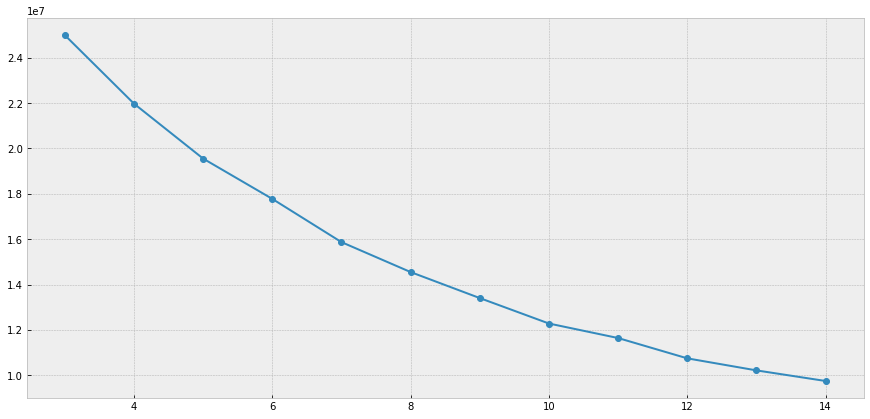

In [63]:
plt.figure(figsize=(15,7))
plt.plot(cluster_df.clusters,cluster_df.errors, marker = 'o')

* Here, we go for 7 clusters.

In [171]:
kModel = KMeans(n_clusters=7)
kModel.fit(concrete_scaled_df_z)
labels = kModel.labels_

In [172]:
concrete_cluster_df_z_copy = concrete_scaled_df_z.copy(True)

In [173]:
concrete_cluster_df_z_copy.head()

,cement,water,superplastic,coarseagg,fineagg,age,strength,blast_furnace_slag,fly_ash
0,-1.339017,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018,1.601441,-0.847144
1,-1.074790,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108,-0.367541,1.096078
2,-0.298384,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144,-0.856888,0.648965
3,-0.145209,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806,0.465044,-0.847144
4,-1.209776,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727,1.269798,-0.847144


In [174]:
predictions = kModel.predict(concrete_scaled_df_z)

In [175]:
concrete_cluster_df_z_copy['class'] = predictions

In [176]:
concrete_cluster_df_z_copy.head()

,cement,water,superplastic,coarseagg,fineagg,age,strength,blast_furnace_slag,fly_ash,class
0,-1.339017,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,-0.355018,1.601441,-0.847144,4
1,-1.074790,-1.090116,0.769617,1.388141,0.282260,-0.501465,-0.737108,-0.367541,1.096078,1
2,-0.298384,0.273274,-0.118015,-0.206121,1.093371,-0.279733,-0.395144,-0.856888,0.648965,1
3,-0.145209,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,0.600806,0.465044,-0.847144,3
4,-1.209776,0.549700,0.484905,0.958372,-0.959363,-0.279733,-1.049727,1.269798,-0.847144,4


In [177]:
concrete_cluster_df_z_copy['class'].unique()

array([4, 1, 3, 6, 2, 0, 5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13c18d8d0>,
      dtype=object)

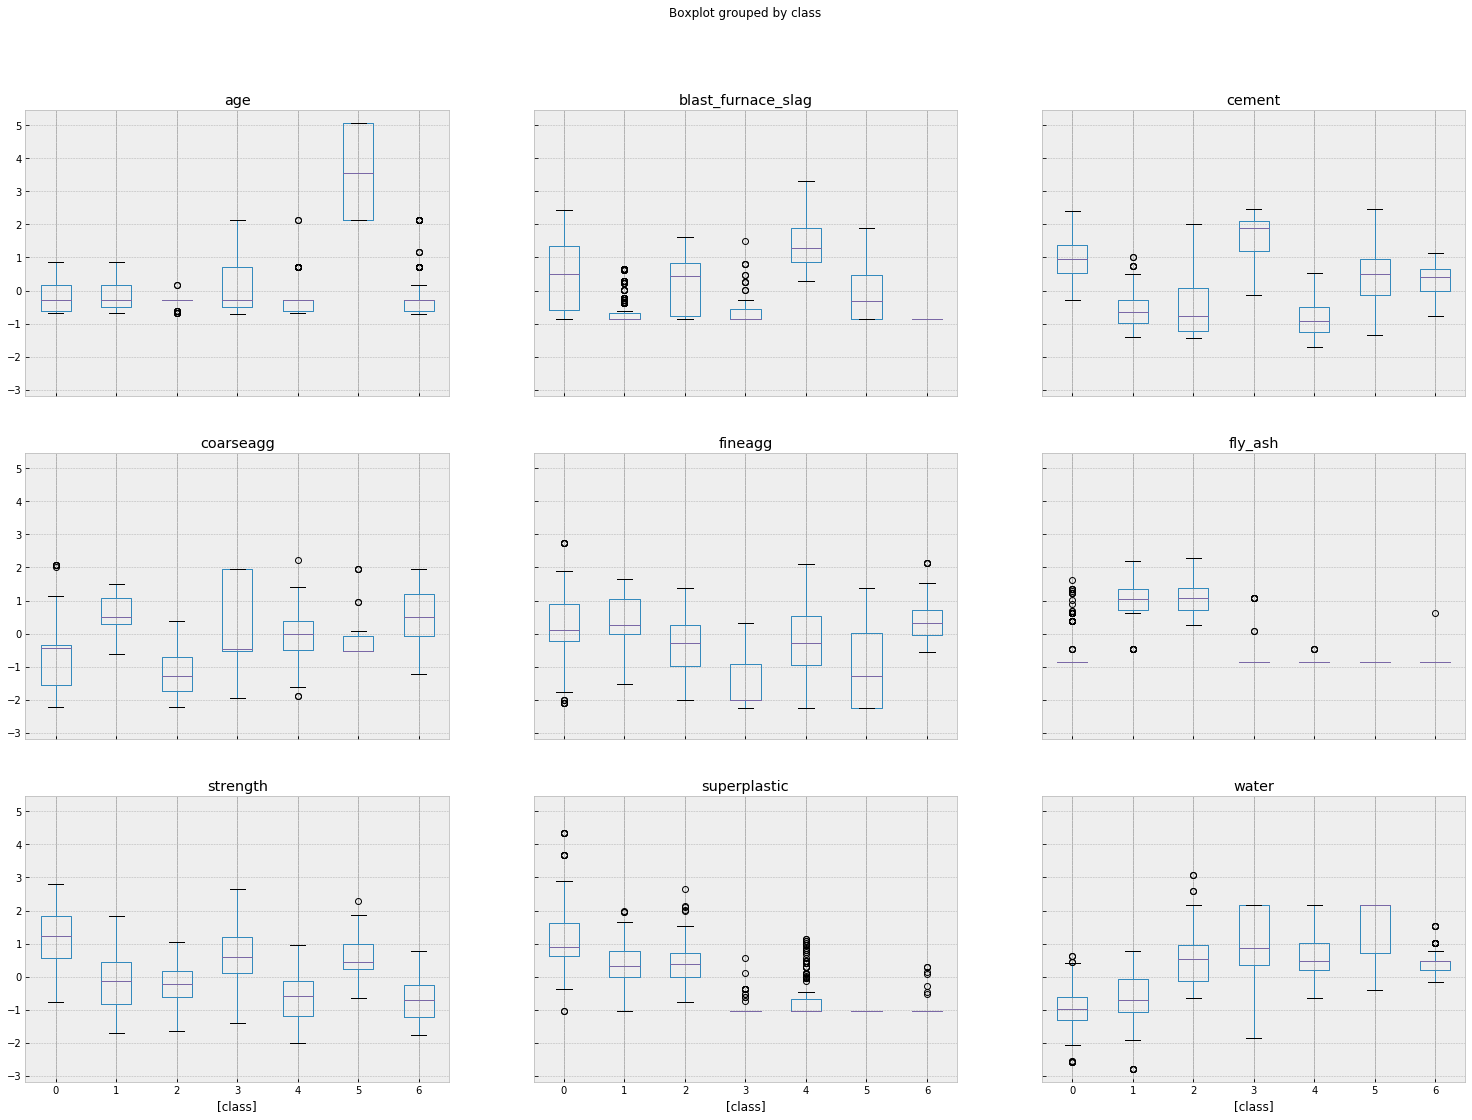

In [178]:
concrete_cluster_df_z_copy.boxplot(by='class', figsize=(25,18))

In [179]:
# Almots all classes have outliers.
# By seeing these boxplot, let check with  capping method .
percentile_95 = concrete_cluster_df_z_copy.quantile(0.95)
percentile_5 = concrete_cluster_df_z_copy.quantile(0.05)

IQR = percentile_95 - percentile_5
temp_df = concrete_cluster_df_z_copy[~((concrete_cluster_df_z_copy < (percentile_5 - 1.5 * IQR)) | (concrete_cluster_df_z_copy > (percentile_95 + 1.5 * IQR))).any(axis=1) ]
print(f"Shape of original data {concrete_cluster_df_z_copy.shape} , Shape of outlier_drop: {temp_df.shape}")
print(f"After removing  ")

Shape of original data (1030, 10) , Shape of outlier_drop: (1030, 10)
After removing  


In [180]:
# Almots all classes have outliers.
# By seeing these boxplot, let check with  normal IQR method .
percentile_75 = concrete_cluster_df_z_copy.quantile(0.75)
percentile_25 = concrete_cluster_df_z_copy.quantile(0.25)

IQR = percentile_75 - percentile_25
nomral_IQ_df = concrete_cluster_df_z_copy[~((concrete_cluster_df_z_copy < (percentile_25 - 1.5 * IQR)) | (concrete_cluster_df_z_copy > (percentile_75 + 1.5 * IQR))).any(axis=1) ]
print(f"Shape of original data {concrete_cluster_df_copy.shape} , Shape of outlier_drop: {temp_df.shape}")
print(f"After removing  ")

Shape of original data (1030, 10) , Shape of outlier_drop: (1030, 10)
After removing  


In [181]:
# By seeing above comparison, we go for replacing outliers with are above 2*std with median
# instead of removing/ droppping outliers
def replaceOutliers(group):
    median, std = group.median(), group.std()  
    outliers = (group - median).abs() > 2*std 
    group[outliers] = group.median()       
    return group

outlier_corrected_group_df = (concrete_cluster_df_z_copy.groupby('class').transform(replaceOutliers)) 
outlier_corrected_df = outlier_corrected_group_df.join(pd.DataFrame(concrete_cluster_df_z_copy['class']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13d0915f8>,
      dtype=object)

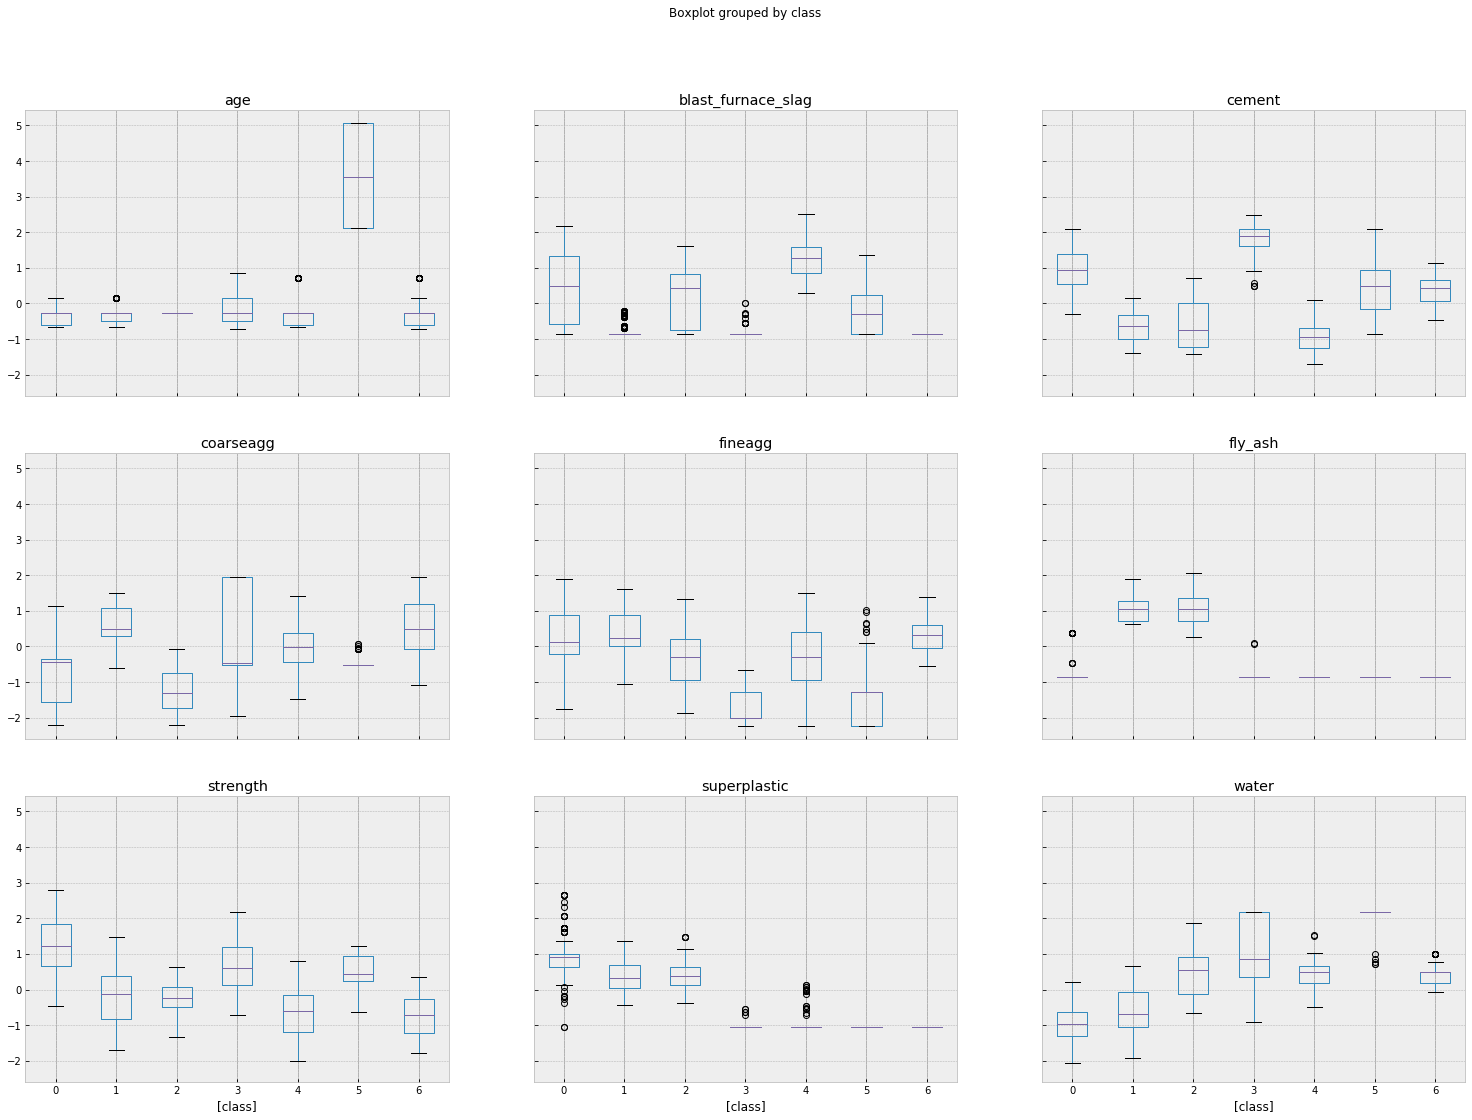

In [182]:
outlier_corrected_df.boxplot(by='class', figsize=(25,18))

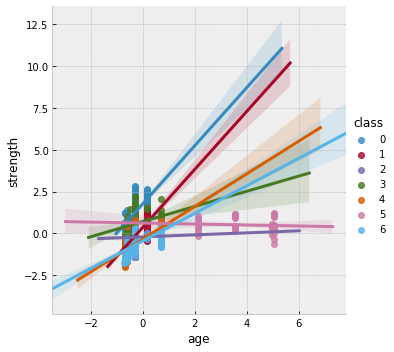

In [183]:
sns.lmplot('age','strength',data=outlier_corrected_df,hue='class')

* In this we can see, the orange line class 5 and 2, which are parallel to the x axis. 
* But considerably, which is strong positive correation to the strength.

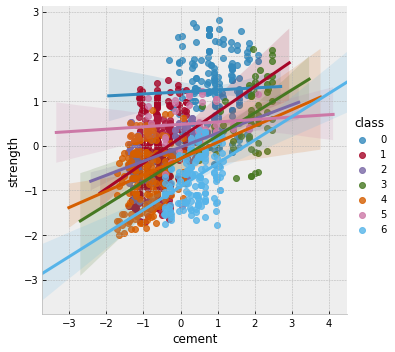

In [187]:
sns.lmplot('cement','strength',data=outlier_corrected_df,hue='class')

* Out of 7, 2 cluster class of age are parllel, 
* But considerably, which is strong positive correation to the strength.

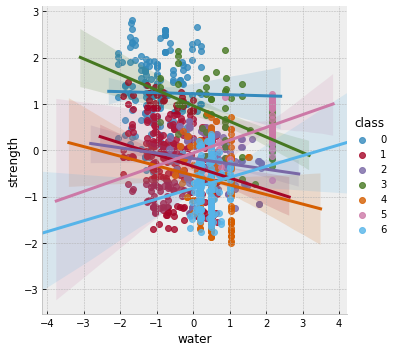

In [186]:
sns.lmplot('water','strength',data=outlier_corrected_df,hue='class')

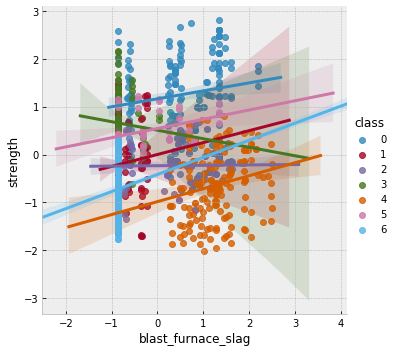

In [188]:
sns.lmplot('blast_furnace_slag','strength',data=outlier_corrected_df,hue='class')

* Here, which are almost all cluster class are parllel to x_axis. Which says 'blast_furnace_slag' feature is not strongly influencing the 'Strength'.
* Each cluster data residual is high.

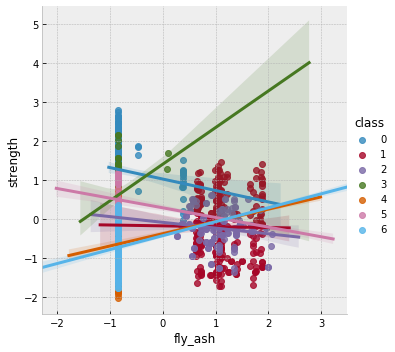

In [189]:
sns.lmplot('fly_ash','strength',data=outlier_corrected_df,hue='class')

* fly_ash is not good influencer to strength

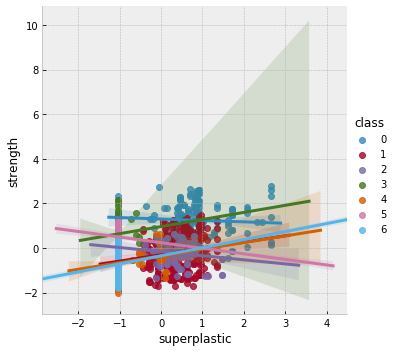

In [191]:
sns.lmplot('superplastic','strength',data=outlier_corrected_df,hue='class')

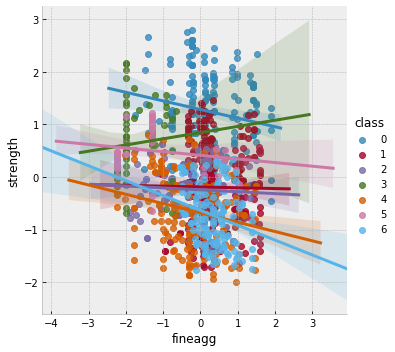

In [192]:
sns.lmplot('fineagg','strength',data=outlier_corrected_df,hue='class')

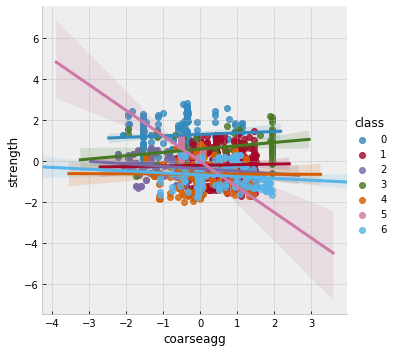

In [193]:
sns.lmplot('coarseagg','strength',data=outlier_corrected_df,hue='class')

* coarseagg is very weak independent variable .
* By seeing its cluster distribution, we can drop this variable.

* From this KMeans cluster analyse, I can say that, 
* compare to other variables, cement is strong influence on strength of the concrete.
* And Water has negative correation with strength.

In [311]:
## Let's try DecisionTreeRegressor algo for finding best features.

In [337]:
DT_rg = DecisionTreeRegressor(max_depth=4)
DT_rg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [338]:
print(f"Train score: {DT_rg.score(X_train,y_train)}")
print(f"Test score: {DT_rg.score(X_test,y_test)}")

Train score: 0.7286342678873311
Test score: 0.6655614189464814


pearsonr = 0.8161446208156032; p_val=4.1904192237152316e-75


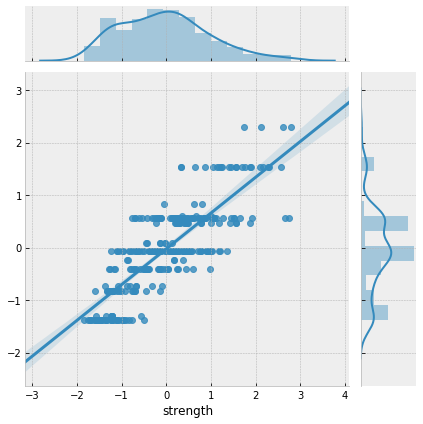

In [339]:
y_pred = DT_rg.predict(X_test)

sns.jointplot(y_test,y_pred,kind='reg')
corr,p_val = pearsonr(y_test,y_pred)
print(f"pearsonr = {corr}; p_val={p_val}")

* Here,I am looking for 95% linear relationship between y_test and y_pred

In [252]:
zipped = sorted(list(zip(X_train.columns,DT_rg.feature_importances_)),key = lambda x: x[1],reverse=True)
print(dict(zipped))

{'cement': 0.5072748545950497, 'age': 0.4032891515508048, 'water': 0.06779461120177366, 'blast_furnace_slag': 0.0216413826523719, 'superplastic': 0.0, 'coarseagg': 0.0, 'fineagg': 0.0, 'fly_ash': 0.0}


* As you can see, "cement and age" are strongly influence the strength of the concrete.

In [318]:
# Let's comapre all models with important features.

In [330]:
drop_cols = ['strength','superplastic','coarseagg','fineagg','fly_ash']
new_X = concrete_cluster_df_z_copy.drop(columns=drop_cols)
new_y = concrete_cluster_df_z_copy['strength']

new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X,new_y,test_size=0.3, random_state=42)

In [340]:
## Decision Tree Regressor model with cement,age and water independent variables.
DTRG = DecisionTreeRegressor(max_depth=4)
DTRG.fit(new_X_train,new_y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [414]:
DTRG_train_score = DTRG.score(new_X_train,new_y_train)
DTRG_test_score = DTRG.score(new_X_test,new_y_test)
print(f"Train score: {DTRG_train_score}")
print(f"Test score: {DTRG_test_score}")

Train score: 0.7614464173317841
Test score: 0.6997181726145678


pearsonr = 0.8371872804014537; p_val=1.8893267816387518e-82


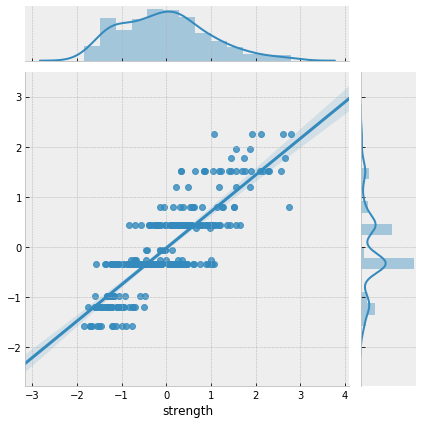

In [415]:
DTRG_y_pred = DTRG.predict(new_X_test)
sns.jointplot(new_y_test,DTRG_y_pred,kind='reg')
corr_DTRG,p_val_DTRG = pearsonr(new_y_test,DTRG_y_pred)
print(f"pearsonr = {corr_DTRG}; p_val={p_val_DTRG}")

In [416]:
DTRG_dict = {'model_name':'Decision Tree Regressor',
            'data_consideration':'considering DecisionTree important features',
            'train_score': [DTRG_train_score],
            'test_score':[DTRG_test_score],
            'corrcoeff':[corr_DTRG],
            'p_val':[p_val_DTRG]
           }
df = pd.DataFrame(DTRG_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75
0,Decision Tree Regressor,considering DecisionTree important features,0.761446,0.699718,0.837187,1.889327e-82


In [418]:
## Suppor Vector Regressor model with cement,age and water independent variables.
SVR_ = SVR()
SVR_.fit(new_X_train,new_y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [419]:
SVR_train_score = SVR_.score(new_X_train,new_y_train)
SVR_test_score = SVR_.score(new_X_test,new_y_test)
print(f"Train score: {SVR_train_score}")
print(f"Test score: {SVR_test_score}")

Train score: 0.8771092629775564
Test score: 0.8295908745895153


pearsonr = 0.9114275954072445; p_val=1.980382585691952e-120


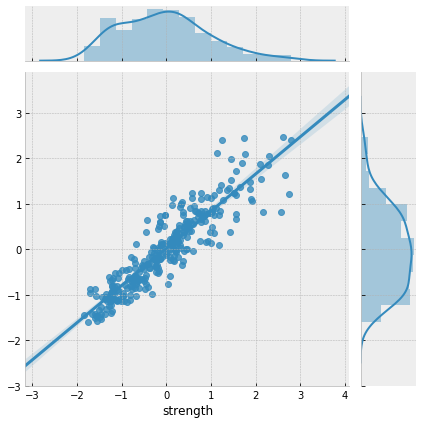

In [420]:
SVR_y_pred = SVR_.predict(new_X_test)
sns.jointplot(new_y_test,SVR_y_pred,kind='reg')
corr_SVR_,p_val_SVR_ = pearsonr(new_y_test,SVR_y_pred)
print(f"pearsonr = {corr_SVR_}; p_val={p_val_SVR_}")

In [421]:
SVR_dict = {'model_name':'SVR',
            'data_consideration':'considering DecisionTree important features',
            'train_score': [SVR_train_score],
            'test_score':[SVR_test_score],
            'corrcoeff':[corr_SVR_],
            'p_val':[p_val_SVR_]
           }
df = pd.DataFrame(SVR_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head()

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75
0,Decision Tree Regressor,considering DecisionTree important features,0.761446,0.699718,0.837187,1.889327e-82
0,SVR,considering DecisionTree important features,0.877109,0.829591,0.911428,1.980383e-120


In [422]:
LR_ = LinearRegression()
LR_.fit(new_X_train,new_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [423]:
LR_train_score = LR_.score(new_X_train,new_y_train)
LR_test_score = LR_.score(new_X_test,new_y_test)
print(f"Train score: {LR_train_score}")
print(f"Test score: {LR_test_score}")

Train score: 0.6525625642255052
Test score: 0.6281089013825031


pearsonr = 0.7940357604672773; p_val=2.4404799682147213e-68


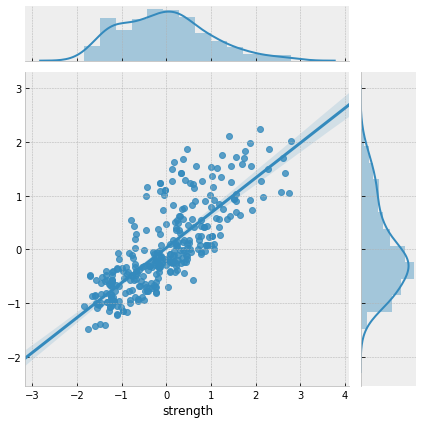

In [424]:
LR_y_pred = LR_.predict(new_X_test)
sns.jointplot(new_y_test,LR_y_pred,kind='reg')
corr_LR_,p_val_LR_ = pearsonr(new_y_test,LR_y_pred)
print(f"pearsonr = {corr_LR_}; p_val={p_val_LR_}")

In [434]:
LR_dict = {'model_name':'Linear Regression',
            'data_consideration':'considering DecisionTree important features',
            'train_score': [LR_train_score],
            'test_score':[LR_test_score],
            'corrcoeff':[corr_LR_],
            'p_val':[p_val_LR_]
           }
df = pd.DataFrame(LR_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(10)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75
0,Decision Tree Regressor,considering DecisionTree important features,0.761446,0.699718,0.837187,1.889327e-82
0,SVR,considering DecisionTree important features,0.877109,0.829591,0.911428,1.980383e-120
0,Linera Regression,considering DecisionTree important features,0.652563,0.628109,0.794036,2.440480e-68


## Let's try PCA

In [254]:
from sklearn.decomposition import PCA

In [256]:
pca_model = PCA(n_components=8)
pca_model.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [260]:
# eigen Values
print(pca_model.explained_variance_)

[2.27583097 1.47191323 1.37537608 1.02156341 0.95734848 0.79811038
 0.17895588 0.02630381]


In [261]:
# eigenVector
print(pca_model.components_)

[[ 0.08494622  0.54669815 -0.49599773  0.01981529 -0.40400991  0.3068909
   0.19547299 -0.3897219 ]
 [-0.18632695  0.03484498  0.27028315 -0.58900146  0.02590774 -0.1404092
   0.70842896 -0.14776616]
 [ 0.81392973 -0.21555845  0.24847906 -0.17684328 -0.04920393  0.02458861
  -0.10018987 -0.43008596]
 [-0.01223847  0.23890734 -0.0370397  -0.54846045  0.46841785  0.53834884
  -0.34261143  0.11821742]
 [ 0.12734397  0.10258109  0.38358867 -0.12384593 -0.64725112  0.28241953
  -0.02481389  0.55809679]
 [-0.16875112 -0.40025628  0.19123557  0.35925327  0.08125401  0.71539079
   0.29936023 -0.19411664]
 [ 0.24235445 -0.50600706 -0.65482931 -0.2222167  -0.03571165  0.06375717
   0.24602272  0.37572865]
 [-0.43818481 -0.41181753 -0.07284752 -0.3561197  -0.43296296 -0.00833135
  -0.42630817 -0.37014511]]


In [262]:
# The percentage of variation explained by each eigen Vector
print(pca_model.explained_variance_ratio_)

[0.28077952 0.18159657 0.16968634 0.12603488 0.1181124  0.09846647
 0.02207859 0.00324522]


Text(0.5, 0, 'eigen values')

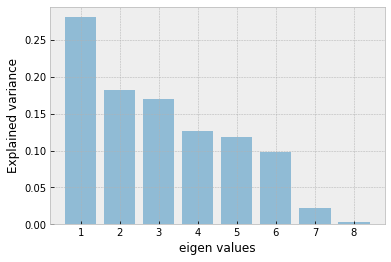

In [293]:
plt.bar(list(range(1,9)),pca_model.explained_variance_ratio_,alpha=0.5,align='center')
plt.ylabel("Explained variance")
plt.xlabel("eigen values")

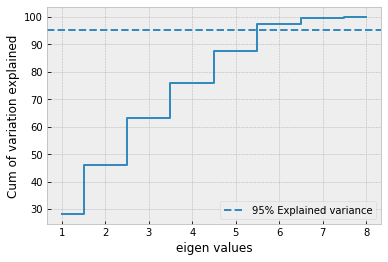

In [294]:
plt.step(list(range(1,9)),np.cumsum(pca_model.explained_variance_ratio_)*100,where='mid')
plt.axhline(y=95,linestyle='--',label='95% Explained variance')
plt.ylabel("Cum of variation explained")
plt.xlabel("eigen values")
plt.legend(loc='lower right')

In [ ]:
# As we can see the steps graph, shows 6 dimesions are important.

In [353]:
pca_train = PCA(0.95)
pca_train.fit(X_train)
Xpca_train = pca_train.transform(X_train)

In [362]:
pca_test = PCA(0.95)
pca_test.fit(X_test)
Xpca_test = pca_test.transform(X_test)

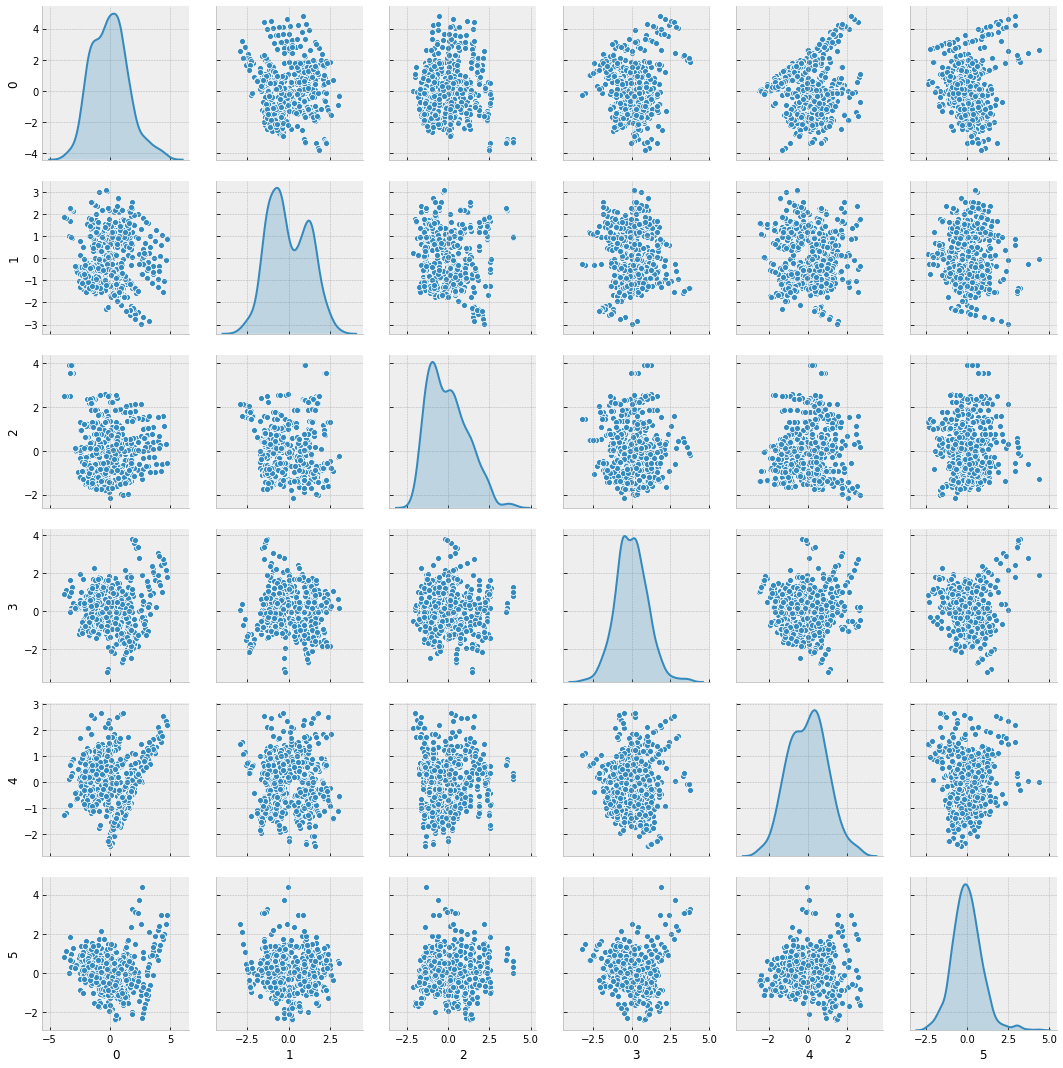

In [358]:
sns.pairplot(pd.DataFrame(Xpca_train),diag_kind = 'kde')

#### Let's try all models like SVR,LinearRegression and DecisionTreeRegressor with PCA data

In [365]:
DTRG_pca = DecisionTreeRegressor(max_depth=6)
DTRG_pca.fit(Xpca_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [435]:
DTRG_pca_train_score = DTRG_pca.score(Xpca_train,y_train)
DTRG_pca_test_score = DTRG_pca.score(Xpca_test,y_test)
print(f"Train score: {DTRG_pca_train_score}")
print(f"Test score: {DTRG_pca_test_score}")

Train score: 0.7832165027661355
Test score: 0.14225335747511403


pearsonr = 0.6486602565799491; p_val=1.1514466851588265e-21


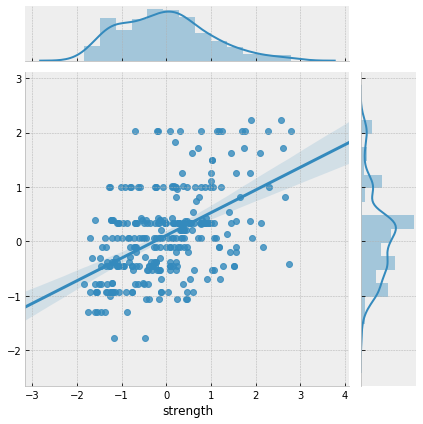

In [436]:
DTRG_pca_y_pred = DTRG_pca.predict(Xpca_test)
sns.jointplot(y_test,DTRG_pca_y_pred,kind='reg')
corr_DTRG_pca,p_val_DTRG_pca = pearsonr(y_test,DTRG_pca_y_pred)
print(f"pearsonr = {corr}; p_val={p_val_DTRG_pca}")

In [439]:
DTRG_pca_dict = {'model_name':'Decision Tree Regression',
            'data_consideration':'considering PCA data',
            'train_score': [DTRG_pca_train_score],
            'test_score':[DTRG_pca_test_score],
            'corrcoeff':[corr_DTRG_pca],
            'p_val':[p_val_DTRG_pca]
           }
df = pd.DataFrame(DTRG_pca_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75
0,Decision Tree Regressor,considering DecisionTree important features,0.761446,0.699718,0.837187,1.889327e-82
0,SVR,considering DecisionTree important features,0.877109,0.829591,0.911428,1.980383e-120
0,Linera Regression,considering DecisionTree important features,0.652563,0.628109,0.794036,2.440480e-68
0,Decision Tree Regression,considering PCA data,0.783217,0.142253,0.507872,1.151447e-21


In [374]:
SVR_pca = SVR()
SVR_pca.fit(Xpca_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [440]:
SVR_pca_train_score = SVR_pca.score(Xpca_train,y_train)
SVR_pca_test_score = SVR_pca.score(Xpca_test,y_test)
print(f"Train score: {SVR_pca_train_score}")
print(f"Test score: {SVR_pca_test_score}")

Train score: 0.8543424554903548
Test score: 0.08322393107150028


pearsonr = 0.5140314488558582; p_val=3.0779222276285073e-22


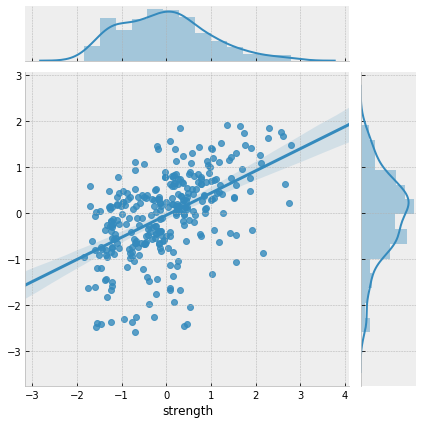

In [441]:
SVR_pca_y_pred = SVR_pca.predict(Xpca_test)
sns.jointplot(y_test,SVR_pca_y_pred,kind='reg')
corr_SVR_pca,p_val_SVR_pca = pearsonr(y_test,SVR_pca_y_pred)
print(f"pearsonr = {corr_SVR_pca}; p_val={p_val_SVR_pca}")

In [442]:
SVR_pca_dict = {'model_name':'SVR',
            'data_consideration':'considering PCA data',
            'train_score': [SVR_pca_train_score],
            'test_score':[SVR_pca_test_score],
            'corrcoeff':[corr_SVR_pca],
            'p_val':[p_val_SVR_pca]
           }
df = pd.DataFrame(SVR_pca_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75
0,Decision Tree Regressor,considering DecisionTree important features,0.761446,0.699718,0.837187,1.889327e-82
0,SVR,considering DecisionTree important features,0.877109,0.829591,0.911428,1.980383e-120
0,Linera Regression,considering DecisionTree important features,0.652563,0.628109,0.794036,2.440480e-68
0,Decision Tree Regression,considering PCA data,0.783217,0.142253,0.507872,1.151447e-21
0,SVR,considering PCA data,0.854342,0.083224,0.514031,3.077922e-22


In [380]:
LR_pca = LinearRegression()
LR_pca.fit(Xpca_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [443]:
LR_pca_train_score = LR_pca.score(Xpca_train,y_train)
LR_pca_test_score = LR_pca.score(Xpca_test,y_test)
print(f"Train score: {LR_pca_train_score}")
print(f"Test score: {LR_pca_test_score}")

Train score: 0.572528394152847
Test score: 0.40721446042101395


pearsonr = 0.6486602565799491; p_val=2.772412515351945e-38


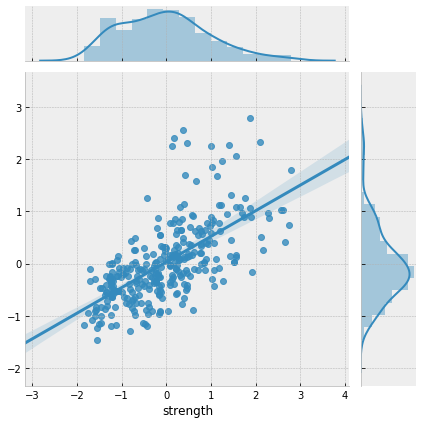

In [444]:
LR_pca_y_pred = LR_pca.predict(Xpca_test)
sns.jointplot(y_test,LR_pca_y_pred,kind='reg')
corr_LR_pca,p_val_LR_pca = pearsonr(y_test,LR_pca_y_pred)
print(f"pearsonr = {corr_LR_pca}; p_val={p_val_LR_pca}")

In [445]:
LR_pca_dict = {'model_name':'Linear Regression',
            'data_consideration':'considering PCA data',
            'train_score': [LR_pca_train_score],
            'test_score':[LR_pca_test_score],
            'corrcoeff':[corr_LR_pca],
            'p_val':[p_val_LR_pca]
           }
df = pd.DataFrame(LR_pca_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75
0,Decision Tree Regressor,considering DecisionTree important features,0.761446,0.699718,0.837187,1.889327e-82
0,SVR,considering DecisionTree important features,0.877109,0.829591,0.911428,1.980383e-120
0,Linera Regression,considering DecisionTree important features,0.652563,0.628109,0.794036,2.440480e-68
0,Decision Tree Regression,considering PCA data,0.783217,0.142253,0.507872,1.151447e-21
0,SVR,considering PCA data,0.854342,0.083224,0.514031,3.077922e-22
0,Linear Regression,considering PCA data,0.572528,0.407214,0.648660,2.772413e-38


In [ ]:
# As we can see
# By using all features,
# SVR, Linear Regression and Decsion Tree Regressor models are good.
# In this, SVR model  perforamance good. comapre to Decision Tree and Linear regression.

In [446]:
# Selecting feature from Decision Tree important feature
# SVR, Linear Regression and Decsion Tree Regressor models are performing good.
# Compare to models with whole data, models with decision tree inportant feature are better.
# Int this SVR model performace is good. And we can see correlation- coefficient is high(0.91) comapre to other models.

In [447]:
# Filtering columns using PCA does not help. 
# SVR, Linear Regression and Decsion Tree Regressor are totaly overfitting.
# we can ignore PCA models.

## Let's check with Ridge and Lasso

#### Models with actual data

In [456]:
ridge_model = Ridge(alpha=0.3)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [457]:
ridge_train_score = ridge_model.score(X_train,y_train)
ridge_test_score = ridge_model.score(X_test,y_test)
print(f"Train score: {ridge_train_score}")
print(f"Test score: {ridge_test_score}")

Train score: 0.6271435406496317
Test score: 0.5845968729950811


pearsonr = 0.7669812911196348; p_val=4.138521258830746e-61


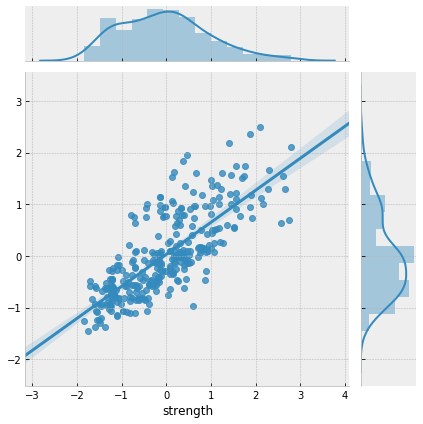

In [458]:
ridge_y_pred = ridge_model.predict(X_test)
sns.jointplot(y_test,ridge_y_pred,kind='reg')
corr_ridge,p_val_ridge = pearsonr(y_test,ridge_y_pred)
print(f"pearsonr = {corr_ridge}; p_val={p_val_ridge}")

In [466]:
print(f"Ridge model coef: {ridge_model.coef_}")

Ridge model coef: [ 0.76844193 -0.1934632   0.1035908   0.08425756  0.10785002  0.4340598
  0.54441181  0.34404074]


In [455]:
ridge_dict = {'model_name':'Ridge',
            'data_consideration':'considering whole data',
            'train_score': [ridge_train_score],
            'test_score':[ridge_test_score],
            'corrcoeff':[corr_ridge],
            'p_val':[p_val_ridge]
           }
df = pd.DataFrame(ridge_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75
0,Decision Tree Regressor,considering DecisionTree important features,0.761446,0.699718,0.837187,1.889327e-82
0,SVR,considering DecisionTree important features,0.877109,0.829591,0.911428,1.980383e-120
0,Linera Regression,considering DecisionTree important features,0.652563,0.628109,0.794036,2.440480e-68
0,Decision Tree Regression,considering PCA data,0.783217,0.142253,0.507872,1.151447e-21
0,SVR,considering PCA data,0.854342,0.083224,0.514031,3.077922e-22
0,Linear Regression,considering PCA data,0.572528,0.407214,0.648660,2.772413e-38
0,Ridge,considering whole data,0.627144,0.584597,0.766981,4.138521e-61


In [460]:
lasso_model = Lasso(alpha=0.3)
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [461]:
lasso_train_score = lasso_model.score(X_train,y_train)
lasso_test_score = lasso_model.score(X_test,y_test)
print(f"Train score: {lasso_train_score}")
print(f"Test score: {lasso_test_score}")

Train score: 0.2136395364408007
Test score: 0.20037468437210537


pearsonr = 0.7669812911196348; p_val=4.138521258830746e-61


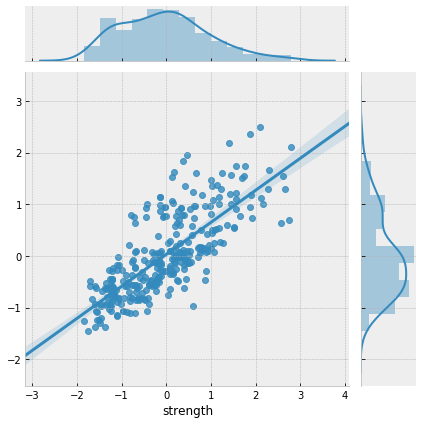

In [462]:
lasso_y_pred = ridge_model.predict(X_test)
sns.jointplot(y_test,lasso_y_pred,kind='reg')
corr_lasso,p_val_lasso = pearsonr(y_test,lasso_y_pred)
print(f"pearsonr = {corr_lasso}; p_val={p_val_lasso}")

In [464]:
print(f"Lasso model coef: {lasso_model.coef_}")

Lasso model coef: [ 0.2047853  -0.          0.05245464 -0.         -0.          0.02390389
  0.         -0.        ]


In [463]:
lasso_dict = {'model_name':'Lasso',
            'data_consideration':'considering whole data',
            'train_score': [lasso_train_score],
            'test_score':[lasso_test_score],
            'corrcoeff':[corr_lasso],
            'p_val':[p_val_lasso]
           }
df = pd.DataFrame(lasso_dict)
tracker_df = pd.concat([tracker_df,df],axis=0)
tracker_df.head(20)

,model_name,data_consideration,train_score,test_score,corrcoeff,p_val
0,SVR,considering whole data,0.878063,0.810493,0.900725,3.406804e-113
0,LineraRegression,considering whole data,0.627147,0.584510,0.766952,4.207717e-61
0,Decision Tree Regressor,considering whole data,0.728634,0.665561,0.816145,4.190419e-75
0,Decision Tree Regressor,considering DecisionTree important features,0.761446,0.699718,0.837187,1.889327e-82
0,SVR,considering DecisionTree important features,0.877109,0.829591,0.911428,1.980383e-120
0,Linera Regression,considering DecisionTree important features,0.652563,0.628109,0.794036,2.440480e-68
0,Decision Tree Regression,considering PCA data,0.783217,0.142253,0.507872,1.151447e-21
0,SVR,considering PCA data,0.854342,0.083224,0.514031,3.077922e-22
0,Linear Regression,considering PCA data,0.572528,0.407214,0.648660,2.772413e-38
0,Ridge,considering whole data,0.627144,0.584597,0.766981,4.138521e-61
